# Importing spatial data

## Import packages

In [2]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import v2

from scipy.stats import gamma
from scipy.stats import vonmises

import os
import pandas as pd

from PIL import Image
import rasterio

3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]


In [3]:
# list the .tif files in the folder
for root, dirs, files in os.walk('../'):
    for file in files:
        if file.endswith('.tif'):
            print(file)

buffalo_canopy_cent100x100_lag_1hr_n1000.tif
buffalo_canopy_cent100x100_lag_1hr_n10000.tif
buffalo_canopy_cent100x100_lag_6hr_n10000.tif
buffalo_canopy_cent50x50_n10000.tif
buffalo_canopy_cent_n10000.tif
buffalo_herby_cent100x100_lag_1hr_n1000.tif
buffalo_herby_cent100x100_lag_1hr_n10000.tif
buffalo_herby_cent100x100_lag_6hr_n10000.tif
buffalo_herby_cent100x100_n10000.tif
buffalo_herby_cent50x50_n10000.tif
buffalo_herby_cent_n10000.tif
buffalo_ndvi_cent100x100_lag_1hr_n1000.tif
buffalo_ndvi_cent100x100_lag_1hr_n10000.tif
buffalo_ndvi_cent100x100_lag_6hr_n10000.tif
buffalo_ndvi_cent50x50_n10000.tif
buffalo_ndvi_cent_n10000.tif
buffalo_pres_cent100x100_lag_1hr_n1000.tif
buffalo_pres_cent100x100_lag_1hr_n10000.tif
buffalo_pres_cent100x100_lag_6hr_n10000.tif
buffalo_pres_cent50x50_n10000.tif
buffalo_pres_cent_n10000.tif
buffalo_slope_cent100x100_lag_1hr_n1000.tif
buffalo_slope_cent100x100_lag_1hr_n10000.tif
buffalo_slope_cent100x100_lag_6hr_n10000.tif
buffalo_slope_cent50x50_n10000.tif
buf

## NDVI

In [6]:
# Path to your TIF file
file_path = '../buffalo_ndvi_cent50x50_n10000.tif'
# with lag
# file_path = '../buffalo_ndvi_cent100x100_lag_6hr_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as ndvi:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    ndvi_stack = ndvi.read([i for i in range(1, ndvi.count + 1)])


In [7]:
print(ndvi_stack.shape)
# print(ndvi_stack.size)

ndvi_tens = torch.from_numpy(ndvi_stack)
print(ndvi_tens.shape)
print("Mean = ", torch.mean(ndvi_tens))

ndvi_max = torch.max(ndvi_tens)
ndvi_min = torch.min(ndvi_tens)

print("Max = ", ndvi_max)
print("Min = ", ndvi_min)

# Normalizing the data
ndvi_tens_norm = (ndvi_tens - ndvi_min) / (ndvi_max - ndvi_min)
print("Mean = ", torch.mean(ndvi_tens_norm))
print("Max = ", torch.max(ndvi_tens_norm))
print("Min = ", torch.min(ndvi_tens_norm))

# print(ndvi_tens_norm.dtype)


(9816, 100, 100)
torch.Size([9816, 100, 100])
Mean =  tensor(0.3054)
Max =  tensor(0.8220)
Min =  tensor(-0.2772)
Mean =  tensor(0.5301)
Max =  tensor(1.)
Min =  tensor(0.)


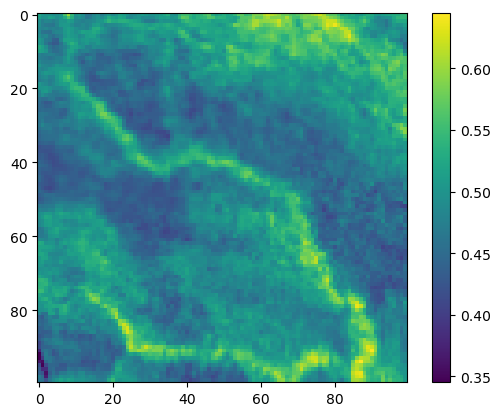

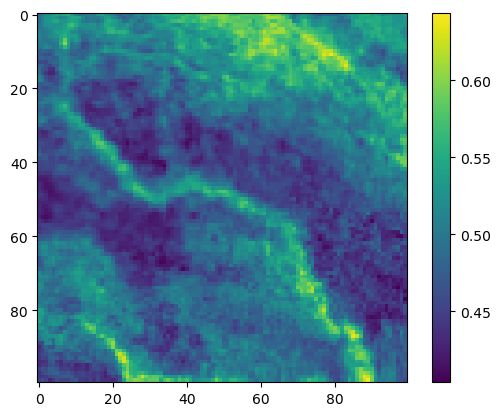

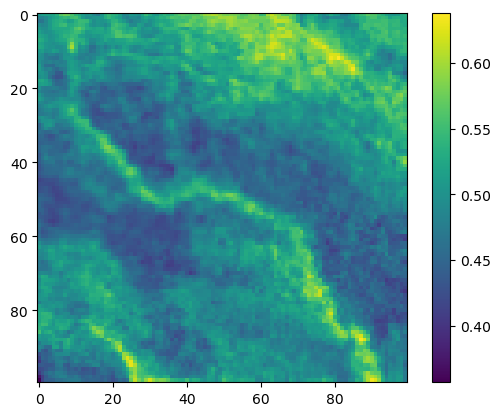

In [8]:
for i in range(0, 3):
    plt.imshow(ndvi_tens_norm[i].numpy())
    plt.colorbar()  
    plt.show()

## Canopy cover

In [9]:
# Path to your TIF file
file_path = '../buffalo_canopy_cent50x50_n10000.tif'
# with lag
# file_path = '../buffalo_canopy_cent100x100_lag_6hr_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as canopy:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    canopy_stack = canopy.read([i for i in range(1, canopy.count + 1)])

print(canopy_stack.shape)

(9816, 100, 100)


In [10]:
print(canopy_stack.shape)
# print(canopy_stack.size)

canopy_tens = torch.from_numpy(canopy_stack)
print(canopy_tens.shape)
print("Mean = ", torch.mean(canopy_tens))

canopy_max = torch.max(canopy_tens)
canopy_min = torch.min(canopy_tens)

print("Max = ", canopy_max)
print("Min = ", canopy_min)

# Normalizing the data
canopy_tens_norm = (canopy_tens - canopy_min) / (canopy_max - canopy_min)
print("Mean = ", torch.mean(canopy_tens_norm))
print("Max = ", torch.max(canopy_tens_norm))
print("Min = ", torch.min(canopy_tens_norm))

# print(canopy_tens_norm.dtype)

(9816, 100, 100)
torch.Size([9816, 100, 100])
Mean =  tensor(44.1513)
Max =  tensor(82.5000)
Min =  tensor(0.)
Mean =  tensor(0.5352)
Max =  tensor(1.)
Min =  tensor(0.)


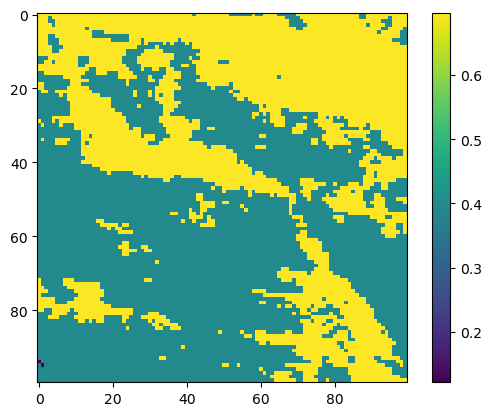

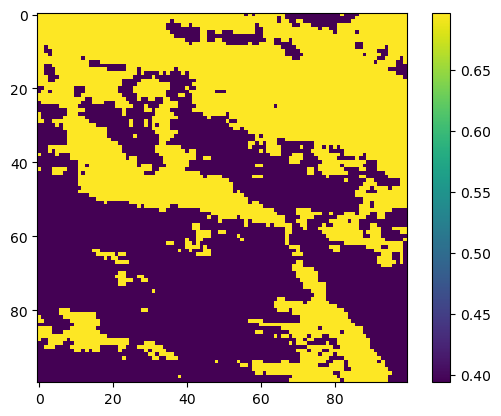

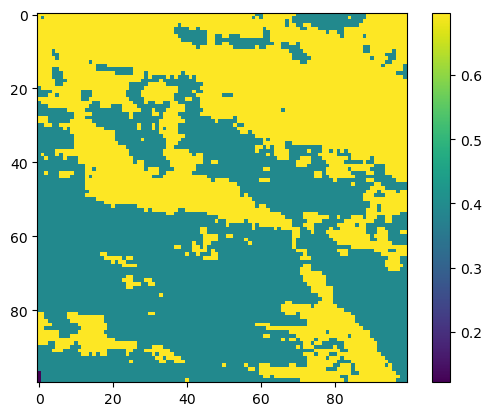

In [11]:
for i in range(0, 3):
    plt.imshow(canopy_tens_norm[i].numpy())
    plt.colorbar()  
    plt.show()

## Herbaceous vegetation

In [12]:
# Path to your TIF file
file_path = '../buffalo_herby_cent50x50_n10000.tif'
# with lag
# file_path = '../buffalo_herby_cent100x100_lag_6hr_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as herby:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    herby_stack = herby.read([i for i in range(1, herby.count + 1)])

print(herby_stack.shape)      

(9816, 100, 100)


In [13]:
print(herby_stack.shape)
# print(canopy_stack.size)

herby_tens = torch.from_numpy(herby_stack)
print(herby_tens.shape)
print("Mean = ", torch.mean(herby_tens))

herby_max = torch.max(herby_tens)
herby_min = torch.min(herby_tens)

print("Max = ", herby_max)
print("Min = ", herby_min)

# Normalizing the data
herby_tens_norm = (herby_tens - herby_min) / (herby_max - herby_min)
print("Mean = ", torch.mean(herby_tens_norm))
print("Max = ", torch.max(herby_tens_norm))
print("Min = ", torch.min(herby_tens_norm))

# print(herby_tens_norm.dtype)

(9816, 100, 100)
torch.Size([9816, 100, 100])
Mean =  tensor(0.8095)


Max =  tensor(1.)
Min =  tensor(0.)
Mean =  tensor(0.8095)
Max =  tensor(1.)
Min =  tensor(0.)


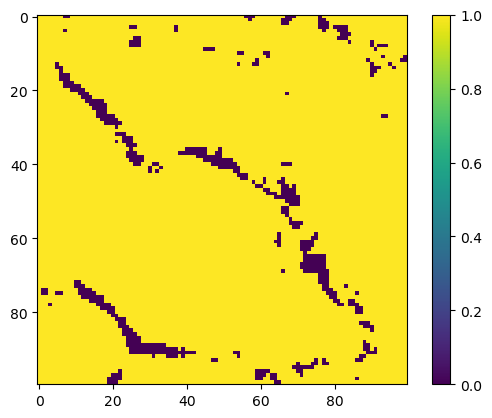

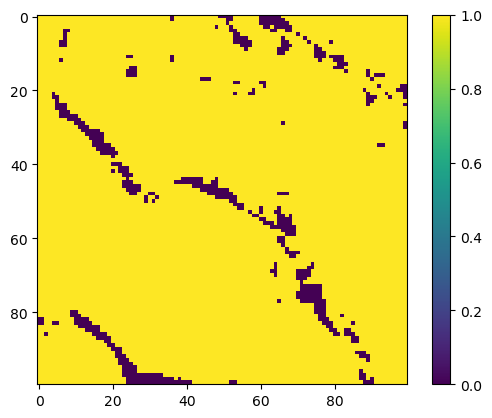

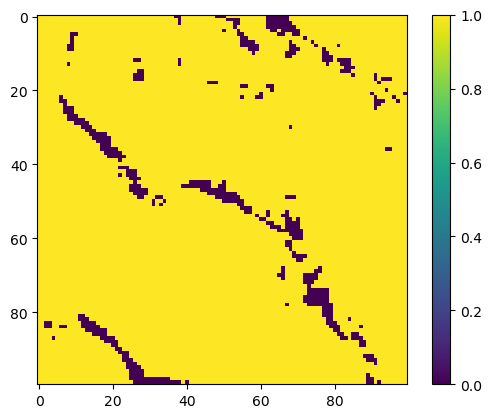

In [14]:
for i in range(0, 3):
    plt.imshow(herby_tens_norm[i])
    plt.colorbar()  
    plt.show()

## Slope

In [15]:
# Path to your TIF file
file_path = '../buffalo_slope_cent50x50_n10000.tif'
# with lag
# file_path = '../buffalo_slope_cent100x100_lag_6hr_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as slope:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    slope_stack = slope.read([i for i in range(1, slope.count + 1)])

print(slope_stack.shape)

(9816, 100, 100)


In [16]:
print(slope_stack.shape)
# print(canopy_stack.size)

slope_tens = torch.from_numpy(slope_stack)
print(slope_tens.shape)
print("Mean = ", torch.mean(slope_tens))

slope_max = torch.max(slope_tens)
slope_min = torch.min(slope_tens)

print("Max = ", slope_max)
print("Min = ", slope_min)

# Normalizing the data
slope_tens_norm = (slope_tens - slope_min) / (slope_max - slope_min)
print("Mean = ", torch.mean(slope_tens_norm))
print("Max = ", torch.max(slope_tens_norm))
print("Min = ", torch.min(slope_tens_norm))

# print(slope_tens_norm.dtype)

(9816, 100, 100)
torch.Size([9816, 100, 100])
Mean =  tensor(0.7717)


Max =  tensor(12.2981)
Min =  tensor(0.0006)
Mean =  tensor(0.0627)
Max =  tensor(1.)
Min =  tensor(0.)


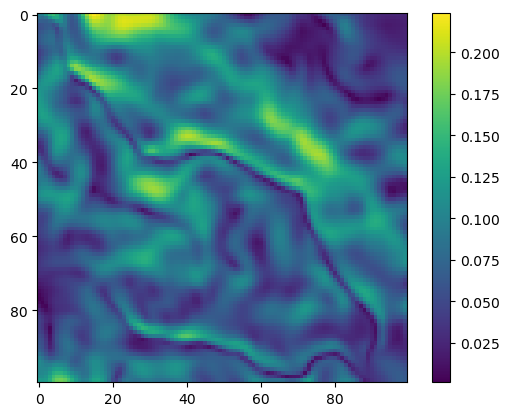

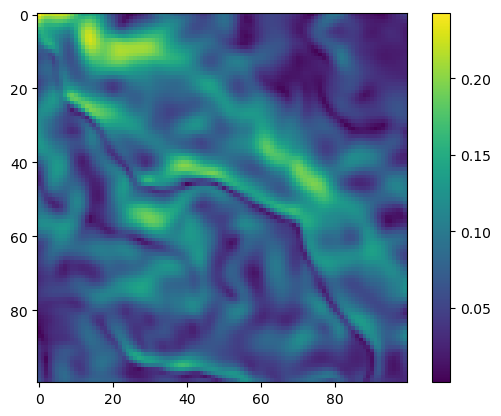

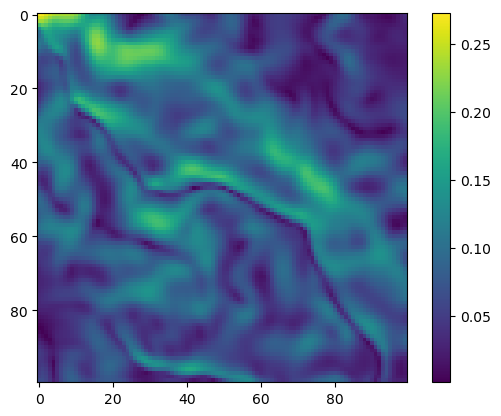

In [17]:
for i in range(0, 3):
    plt.imshow(slope_tens_norm[i])
    plt.colorbar()  
    plt.show()

## Presence records - target of model

In [18]:
# Path to your TIF file
file_path = '../buffalo_pres_cent50x50_n10000.tif'
# with lag
# file_path = '../buffalo_pres_cent100x100_lag_6hr_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as pres:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    pres_stack = pres.read([i for i in range(1, pres.count + 1)])

print(pres_stack.shape)

(9816, 100, 100)


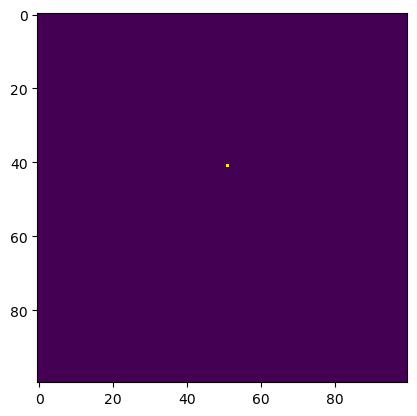

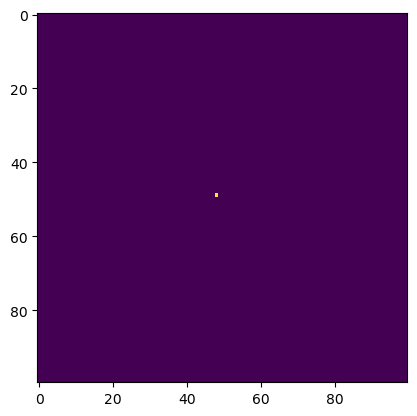

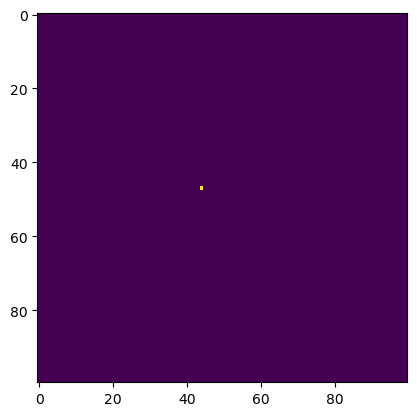

In [19]:
for i in range(0, 3):
    plt.imshow(pres_stack[i])
    plt.show()

Find the index of the occupied cell

In [20]:
# pres_stack
# Find the coordinates of the 1
coordinates = np.where(pres_stack[0] == 1)
print(coordinates)
x, y = coordinates[0][0], coordinates[1][0]
print(x, y)

(array([41], dtype=int64), array([51], dtype=int64))
41 51


In [21]:
# Convert coordinates to single index for CrossEntropyLoss
index = x * 100 + y
print(index)

4151


Now do for all locations

In [22]:
# Iterate over all the layers in the stack and store the coordinates of the 1
indices = []
for i in range(0, pres.count-1):
    # print(i)
    coordinates = np.where(pres_stack[i] == 1)
    x, y = coordinates[0][0], coordinates[1][0]
    index = x * 100 + y
    indices.append(index)


In [23]:
print(indices)
# how many entries in indices
print(len(indices))

[4151, 4948, 4744, 5152, 4842, 5048, 7052, 4949, 5049, 4240, 4615, 4747, 4448, 4949, 4950, 5049, 5445, 6456, 5166, 5050, 5049, 4950, 5367, 6765, 2882, 4043, 4231, 4643, 5142, 6357, 5049, 4950, 5050, 5049, 4343, 3432, 5542, 4349, 5144, 5050, 5049, 4559, 5254, 5964, 4756, 5052, 5242, 4949, 4948, 6258, 4949, 5049, 5047, 6528, 5050, 5049, 5135, 4351, 5360, 5053, 5049, 4950, 5049, 4949, 5050, 4949, 6567, 5963, 2679, 5047, 2115, 6150, 4950, 5050, 5347, 6035, 6360, 4958, 4653, 5050, 5049, 4949, 5042, 4751, 5049, 5049, 6347, 5254, 5252, 4846, 4861, 5048, 6348, 4950, 5049, 4950, 5050, 3854, 6147, 5047, 5050, 4949, 5049, 4950, 5050, 5049, 5745, 8150, 4956, 5052, 5152, 3078, 3344, 7136, 5050, 5049, 4949, 5731, 5333, 5446, 5348, 4751, 5457, 4150, 2741, 4950, 5049, 5049, 4950, 5049, 4158, 3858, 4363, 5153, 5658, 5350, 4346, 5247, 5336, 5047, 5050, 4950, 4226, 5523, 4948, 5859, 5354, 4952, 4949, 5049, 4950, 5051, 5049, 5050, 6451, 6666, 5050, 4861, 773, 4749, 5049, 4745, 4742, 5248, 5945, 5049, 4736

In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


# Starting to build up a model

Combing the data into a TensorDataSet

In [82]:
print(indices[0:800])

[4151, 4948, 4744, 5152, 4842, 5048, 7052, 4949, 5049, 4240, 4615, 4747, 4448, 4949, 4950, 5049, 5445, 6456, 5166, 5050, 5049, 4950, 5367, 6765, 2882, 4043, 4231, 4643, 5142, 6357, 5049, 4950, 5050, 5049, 4343, 3432, 5542, 4349, 5144, 5050, 5049, 4559, 5254, 5964, 4756, 5052, 5242, 4949, 4948, 6258, 4949, 5049, 5047, 6528, 5050, 5049, 5135, 4351, 5360, 5053, 5049, 4950, 5049, 4949, 5050, 4949, 6567, 5963, 2679, 5047, 2115, 6150, 4950, 5050, 5347, 6035, 6360, 4958, 4653, 5050, 5049, 4949, 5042, 4751, 5049, 5049, 6347, 5254, 5252, 4846, 4861, 5048, 6348, 4950, 5049, 4950, 5050, 3854, 6147, 5047, 5050, 4949, 5049, 4950, 5050, 5049, 5745, 8150, 4956, 5052, 5152, 3078, 3344, 7136, 5050, 5049, 4949, 5731, 5333, 5446, 5348, 4751, 5457, 4150, 2741, 4950, 5049, 5049, 4950, 5049, 4158, 3858, 4363, 5153, 5658, 5350, 4346, 5247, 5336, 5047, 5050, 4950, 4226, 5523, 4948, 5859, 5354, 4952, 4949, 5049, 4950, 5051, 5049, 5050, 6451, 6666, 5050, 4861, 773, 4749, 5049, 4745, 4742, 5248, 5945, 5049, 4736

Combine the spatial layers into channels

In [25]:
# Stack the channels along a new axis; here, 1 is commonly used for channel axis in PyTorch
# combined_stack = np.stack([ndvi_stack_norm, canopy_stack, herby_stack, slope_stack], axis=1)
combined_stack = torch.stack([ndvi_tens_norm, canopy_tens_norm, herby_tens_norm, slope_tens_norm], dim=1)
combined_stack
print(combined_stack.shape)

torch.Size([9816, 4, 100, 100])


Define some transforms for data augmentation

In [26]:
transforms = v2.Compose([
    v2.RandomRotation(180),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5)
])

In [27]:
out = transforms(combined_stack)
print(out.shape)

torch.Size([9816, 4, 100, 100])


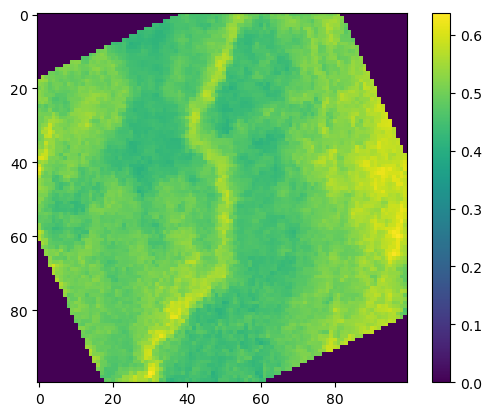

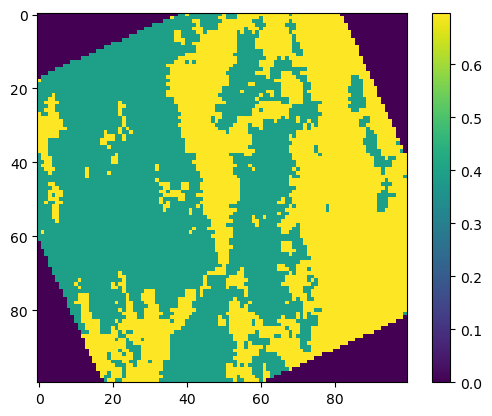

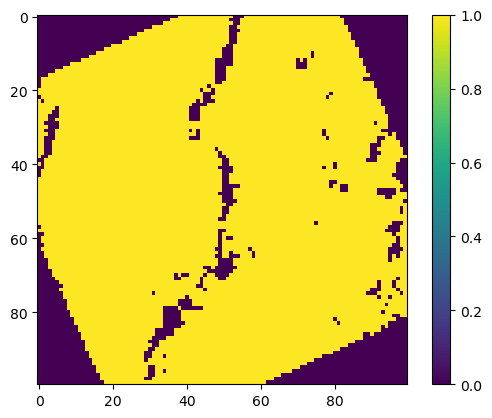

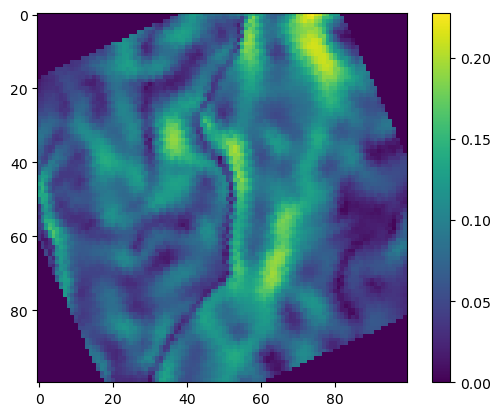

In [28]:
for i in range(0, 4):
    plt.imshow(out[1,i,:,:].numpy())
    plt.colorbar()  
    plt.show()

In [29]:
# Convert to a torch tensor (if using as a target for loss calculation)
# target = torch.tensor([indices], dtype=torch.long)

train_prop = 0.8

train_n = round(combined_stack.shape[0] * train_prop)
print(train_n)
# print(combined_stack.shape[0] * (1 - train_prop))

# length of training data (not used)
test_n = round(combined_stack.shape[0] * (1 - train_prop))
print(test_n)

# the target has one less sample than the training data as there is no step after the last sample
total_n = len(indices)
print(total_n)


7853
1963
9815


## Defining data sets and data loaders

In [30]:
# set up some hyperparameters
bs = 10

# train_ds = TensorDataset(torch.from_numpy(combined_stack[0:train_n]), torch.tensor(indices[0:train_n], dtype=torch.long))
# print(train_ds)
# print(train_ds.tensors)
# train_dl = DataLoader(train_ds, batch_size=bs, shuffle = True)

train_ds = TensorDataset(combined_stack[0:train_n], torch.tensor(indices[0:train_n], dtype=torch.long))
print(train_ds)
print(train_ds.tensors)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle = True)

test_ds = TensorDataset(combined_stack[train_n:total_n], torch.tensor(indices[train_n:total_n], dtype=torch.long))
# print(train_ds)
# print(train_ds.tensors)
test_dl = DataLoader(test_ds, batch_size=bs, shuffle = True)


(tensor([[[[5.2239e-01, 5.0436e-01, 4.9965e-01,  ..., 5.3130e-01,
           5.4299e-01, 5.4541e-01],
          [5.1396e-01, 4.9710e-01, 5.0052e-01,  ..., 5.4132e-01,
           5.4339e-01, 5.4389e-01],
          [4.9475e-01, 4.7446e-01, 4.8375e-01,  ..., 5.2926e-01,
           5.2793e-01, 5.2630e-01],
          ...,
          [4.4106e-01, 4.2744e-01, 3.5946e-01,  ..., 5.2577e-01,
           5.0716e-01, 5.0143e-01],
          [4.6955e-01, 4.5211e-01, 3.6991e-01,  ..., 5.3404e-01,
           5.2704e-01, 5.0424e-01],
          [4.6056e-01, 4.5753e-01, 4.2358e-01,  ..., 5.3563e-01,
           5.3430e-01, 5.0820e-01]],

         [[6.9697e-01, 6.9697e-01, 6.9697e-01,  ..., 6.9697e-01,
           6.9697e-01, 6.9697e-01],
          [6.9697e-01, 6.9697e-01, 6.9697e-01,  ..., 6.9697e-01,
           6.9697e-01, 6.9697e-01],
          [6.9697e-01, 6.9697e-01, 6.9697e-01,  ..., 6.9697e-01,
           6.9697e-01, 6.9697e-01],
          ...,
          [3.9394e-01, 3.9394e-01, 3.9394e-01,  ..., 3.939

In [31]:
print(train_dl)
print(train_dl.dataset.tensors[0].shape)
print(test_dl.dataset.tensors[0].shape)

print(train_dl.dataset.tensors[1].shape)
print(test_dl.dataset.tensors[1].shape)

torch.Size([7853, 4, 100, 100])
torch.Size([1962, 4, 100, 100])
torch.Size([7853])
torch.Size([1962])


## Define the model

In [32]:
class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_model = nn.Sequential(
            # input Nx4x200x200, output Nx16x100x100
            nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, stride=1, padding=1),
            # same dimensions
            nn.ReLU(),
            # # will reduce dimensions by half to Nx16x50x50
            nn.MaxPool2d(kernel_size=2, stride=2),
            # input Nx16x50x50, output Nx32x50x50
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            # same dimensions
            nn.ReLU(),
            # # will reduce dimensions by half to Nx32x25x25
            nn.MaxPool2d(kernel_size=2, stride=2),
            # flatten to vectors of Nx20000
            nn.Flatten(1,-1),
            nn.Linear(32*25*25, 1000),
            nn.Dropout(),
            nn.ReLU(),
            nn.Linear(1000, 1000),
            nn.Dropout(),
            nn.ReLU(),
            nn.Linear(1000, 10000)
        )

    def forward(self, x):
        logits = self.cnn_model(x)
        return logits
        
        # pred_probab = nn.Softmax(dim=1)(logits)
        # return pred_probab
    
        

Take a look at the model's structure

In [33]:
model = ConvNeuralNetwork().to(device)
print(model)

ConvNeuralNetwork(
  (cnn_model): Sequential(
    (0): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=20000, out_features=1000, bias=True)
    (8): Dropout(p=0.5, inplace=False)
    (9): ReLU()
    (10): Linear(in_features=1000, out_features=1000, bias=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): ReLU()
    (13): Linear(in_features=1000, out_features=10000, bias=True)
  )
)


In [34]:
X = torch.rand(1, 4, 100, 100, device=device)
# logits = model(X)
pred_probab = model(X)
# pred_probab = nn.Softmax(dim=1)(logits)
# y_pred = pred_probab.argmax(1)
# print(f"Predicted class: {y_pred}")

Making a spatial layer of distances and bearings from the origin

In [6]:
distance_layer = torch.zeros(1, 100, 100, device=device)

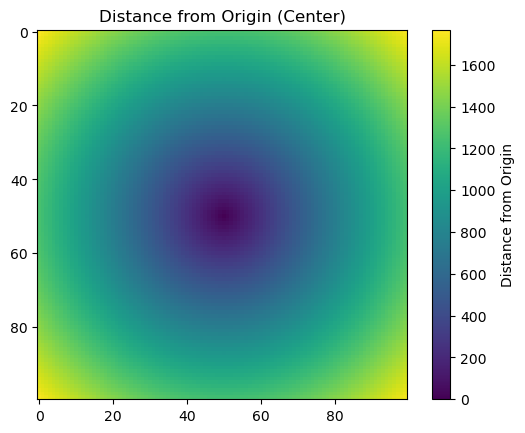

In [8]:
def create_distance_layer(size, res):
    """
    Create a spatial layer with distances from the origin (center).
    
    Parameters:
    size (int): The size of the layer (size x size).
    
    Returns:
    np.ndarray: A 2D array with distances from the center.
    """
    center = size // 2
    y, x = np.indices((size, size))
    distance_layer = np.sqrt((res*(x - center))**2 + (res*(y - center))**2)
    return distance_layer

# Example usage:
size = 100
res = 25
distance_layer = create_distance_layer(size, res)

# Display the distance layer
plt.imshow(distance_layer, cmap='viridis')
plt.colorbar(label='Distance from Origin')
plt.title('Distance from Origin (Center)')
plt.show()

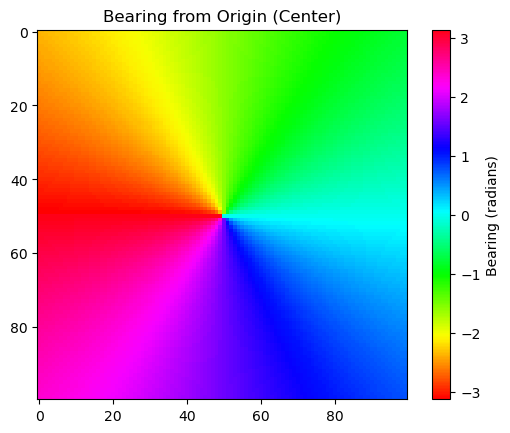

In [9]:
def create_bearing_layer(size):
    """
    Create a spatial layer with bearings from the origin (center).
    
    Parameters:
    size (int): The size of the layer (size x size).
    
    Returns:
    np.ndarray: A 2D array with bearings from the center.
    """
    center = size // 2
    y, x = np.indices((size, size))
    bearing_layer = np.arctan2(y - center, x - center)
    return bearing_layer

# Example usage:
size = 100
bearing_layer = create_bearing_layer(size)

# Display the bearing layer
plt.imshow(bearing_layer, cmap='hsv')
plt.colorbar(label='Bearing (radians)')
plt.title('Bearing from Origin (Center)')
plt.show()

Multiply by the gamma density

5.315790754096681
1.0


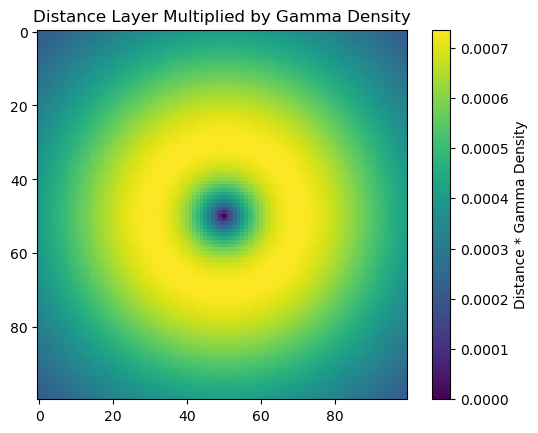

In [28]:
def gamma_density(x, shape, scale):
    """
    Compute the density of the gamma distribution at point x.
    
    Parameters:
    x (float): The point at which to evaluate the density.
    shape (float): The shape parameter (often denoted as k or α).
    scale (float): The scale parameter (often denoted as θ).
    
    Returns:
    float: The density of the gamma distribution at point x.
    """
    return gamma.pdf(x, a=shape, scale=scale)

# Example usage:
shape = 2
scale = 500.0

# Compute the gamma density values for each point in the distance layer
gamma_density_layer = gamma_density(distance_layer, shape, scale)
gamma_density_layer_norm = gamma_density_layer / np.sum(gamma_density_layer)

# sum the values of the gamma_density_layer
print(np.sum(gamma_density_layer))
print(np.sum(gamma_density_layer_norm))

# Multiply the distance layer by the gamma density values
# result_layer = distance_layer * gamma_density_layer

# Display the result layer
plt.imshow(gamma_density_layer, cmap='viridis')
plt.colorbar(label='Distance * Gamma Density')
plt.title('Distance Layer Multiplied by Gamma Density')
plt.show()

The sum of the von Mises density values is 1570.7970299301967


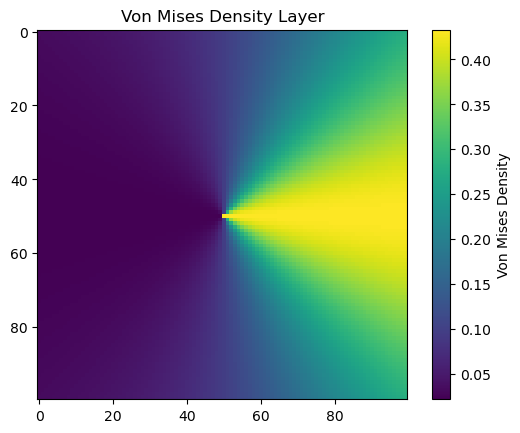

In [35]:
def vonmises_density(x, kappa, loc=0):
    """
    Compute the density of the von Mises distribution at point x.
    
    Parameters:
    x (float): The point at which to evaluate the density.
    kappa (float): The concentration parameter (often denoted as κ).
    loc (float): The location parameter (often denoted as μ). Default is 0.
    
    Returns:
    float: The density of the von Mises distribution at point x.
    """
    return vonmises.pdf(x, kappa, loc=loc)

# Example usage:
kappa = 1.5
loc = 0

# Compute the von Mises density values for each point in the bearing layer
vonmises_density_layer = vonmises_density(bearing_layer, kappa, loc)

# Sum the values of the von Mises density layer
sum_vonmises_density = np.sum(vonmises_density_layer)

print(f"The sum of the von Mises density values is {sum_vonmises_density}")

# Display the von Mises density layer
plt.imshow(vonmises_density_layer, cmap='viridis')
plt.colorbar(label='Von Mises Density')
plt.title('Von Mises Density Layer')
plt.show()

0.9999999999999999


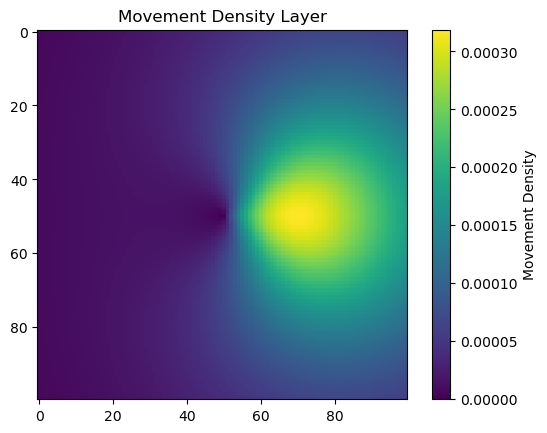

In [36]:
movement_density = gamma_density_layer * vonmises_density_layer
movement_density_norm = movement_density / np.sum(movement_density)
print(np.sum(movement_density_norm))

# Display the movement density layer
plt.imshow(movement_density, cmap='viridis')
plt.colorbar(label='Movement Density')
plt.title('Movement Density Layer')
plt.show()

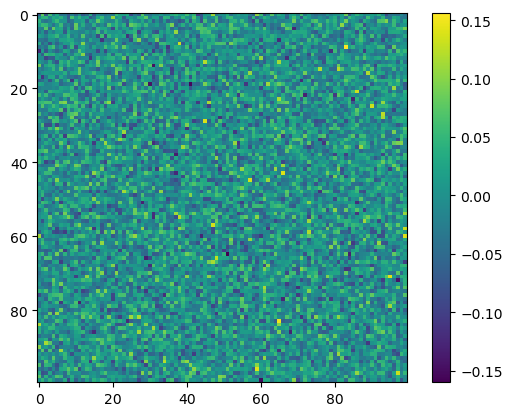

In [35]:
pred_probab

image = pred_probab.view(100, 100).detach().cpu().numpy()
plt.imshow(image)  # 'cmap' can be adjusted based on your data
plt.colorbar()  # Optionally add a colorbar to see the scale
# plt.title('Output Image')
plt.show()

In [36]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: cnn_model.0.weight | Size: torch.Size([16, 4, 3, 3]) | Values : tensor([[[[-0.0222,  0.1610, -0.0734],
          [ 0.1186,  0.0219,  0.1486],
          [ 0.1517,  0.1199,  0.1050]],

         [[ 0.1025, -0.1181,  0.0654],
          [ 0.1613, -0.0083,  0.0801],
          [-0.1315, -0.1660, -0.1528]],

         [[-0.0094,  0.0951,  0.1404],
          [ 0.0497,  0.1401,  0.0905],
          [-0.1214,  0.0211,  0.1415]],

         [[ 0.0862, -0.1068, -0.0638],
          [-0.1008,  0.1138, -0.0922],
          [-0.1510,  0.1312,  0.0474]]],


        [[[ 0.1030, -0.1638,  0.0699],
          [ 0.0611, -0.0753, -0.1446],
          [-0.0139,  0.0513, -0.0751]],

         [[ 0.0145, -0.1651,  0.1199],
          [-0.1256,  0.0850, -0.1472],
          [ 0.0142,  0.1163, -0.0275]],

         [[ 0.1584,  0.0010,  0.1016],
          [ 0.0529,  0.0104,  0.1561],
          [-0.0577, -0.1300,  0.0207]],

         [[-0.0364,  0.0220,  0.0992],
          [ 0.0188, -0.1355,  0.0702],
          [-0.08

## Loss function and optimizer

In [37]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training loop

In [38]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Flatten the target tensor 'y'
        # y_flattened = y.view(y.shape[0], -1)

        # Compute prediction and loss
        # pred = model(X)
        # loss = loss_fn(pred, y_flattened)
        # loss = loss_fn(model(X), y.view(y.shape[0], -1))

        # with cross entropy loss
        loss = loss_fn(model(X), y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * bs + len(X)
            print(f"loss: {loss:>15f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            # pred = model(X)
            # test_loss += loss_fn(model(X), y.view(y.shape[0], -1)).item()
            # correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            # with cross entropy loss
            test_loss += loss_fn(model(X), y)

    test_loss /= num_batches
    # correct /= size
    # print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    print(f"Avg loss: {test_loss:>15f} \n")

## Train the model

In [39]:
# learning_rate = 1e-1
batch_size = bs # does not actually affect the batch size - this should be changed prior to creating the dataloader object
epochs = 1

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dl, model, loss_fn, optimizer)
    test_loop(test_dl, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss:        9.212762  [   10/ 7853]
loss:        7.605274  [  110/ 7853]
loss:        5.900227  [  210/ 7853]
loss:        8.044184  [  310/ 7853]
loss:        6.853939  [  410/ 7853]
loss:        6.956285  [  510/ 7853]
loss:        8.815384  [  610/ 7853]
loss:        8.315201  [  710/ 7853]
loss:        6.573347  [  810/ 7853]
loss:        7.466827  [  910/ 7853]
loss:        7.946639  [ 1010/ 7853]
loss:        5.909305  [ 1110/ 7853]
loss:        7.827432  [ 1210/ 7853]
loss:        7.040910  [ 1310/ 7853]
loss:        7.464101  [ 1410/ 7853]
loss:        6.243074  [ 1510/ 7853]
loss:        7.579816  [ 1610/ 7853]
loss:        5.783578  [ 1710/ 7853]
loss:        6.074286  [ 1810/ 7853]
loss:        7.911624  [ 1910/ 7853]
loss:        7.685291  [ 2010/ 7853]
loss:        5.421809  [ 2110/ 7853]
loss:        6.097620  [ 2210/ 7853]
loss:        7.253584  [ 2310/ 7853]
loss:        7.487280  [ 2410/ 7853]
loss:        7.039971  [ 2510/ 7853

In [40]:
print(model.state_dict())

OrderedDict([('cnn_model.0.weight', tensor([[[[-0.0487,  0.1343, -0.1005],
          [ 0.0939, -0.0030,  0.1231],
          [ 0.1263,  0.0938,  0.0781]],

         [[ 0.0816, -0.1384,  0.0453],
          [ 0.1424, -0.0256,  0.0628],
          [-0.1469, -0.1822, -0.1717]],

         [[-0.0240,  0.0834,  0.1290],
          [ 0.0315,  0.1250,  0.0787],
          [-0.1376,  0.0060,  0.1273]],

         [[ 0.0873, -0.1037, -0.0615],
          [-0.0905,  0.1251, -0.0807],
          [-0.1384,  0.1437,  0.0599]]],


        [[[ 0.0865, -0.1796,  0.0535],
          [ 0.0443, -0.0921, -0.1621],
          [-0.0290,  0.0351, -0.0913]],

         [[-0.0076, -0.1880,  0.0972],
          [-0.1505,  0.0655, -0.1706],
          [-0.0070,  0.0968, -0.0444]],

         [[ 0.1436, -0.0140,  0.0862],
          [ 0.0341, -0.0053,  0.1385],
          [-0.0635, -0.1420,  0.0079]],

         [[-0.0660, -0.0074,  0.0671],
          [-0.0062, -0.1601,  0.0439],
          [-0.0906, -0.0288,  0.0031]]],


        

## Generate predictions

torch.Size([1, 4, 100, 100])


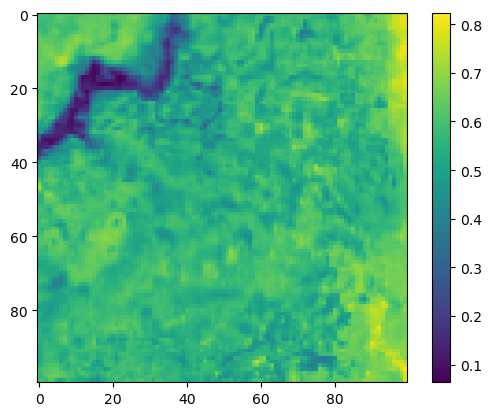

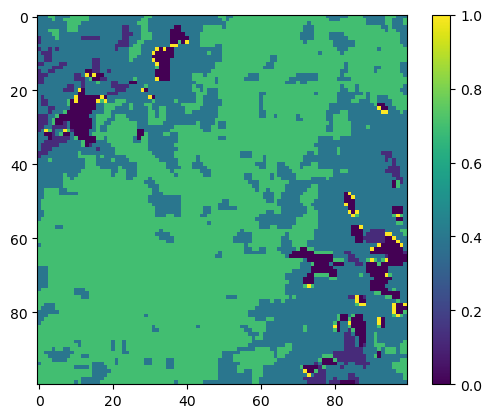

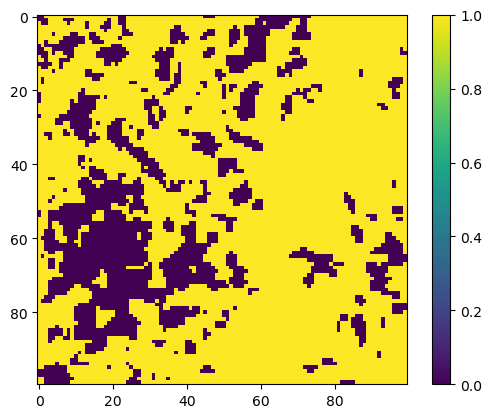

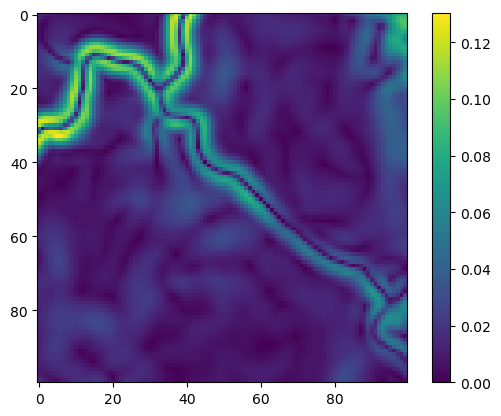

In [81]:
# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
# with torch.inference_mode():
#   # 3. Make sure the calculations are done with the model and data on the same device
#   # in our case, we haven't setup device-agnostic code yet so our data and model are
#   # on the CPU by default.
#   # model_0.to(device)
#   # X_test = X_test.to(device)
#   y_preds = model(X_test)
# y_preds

pred_x = train_dl.dataset.tensors[0][5000,:,:,:].unsqueeze(0)
print(pred_x.shape)

for i in range(0, 4):
    plt.imshow(pred_x[0, i].numpy())
    plt.colorbar()  
    plt.show()

# Display the plot
plt.show()

In [82]:
with torch.no_grad():
  logits = model(pred_x)
logits

tensor([[-10.2143,  -9.5271,  -9.2622,  ...,  -9.1585,  -9.7456,  -9.3975]])

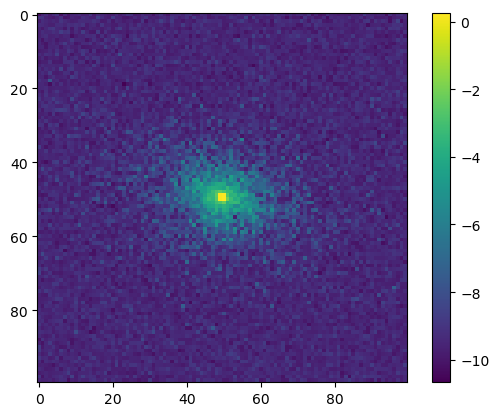

In [83]:
image = logits.view(100, 100).detach().cpu().numpy()
plt.imshow(image)  # 'cmap' can be adjusted based on your data
plt.colorbar()  # Optionally add a colorbar to see the scale
# plt.title('Output Image')
plt.show()

## Predict next step

In [84]:
loc_next = torch.argmax(logits)
print(loc_next)

tensor(5050)


### Extract the cell's index

In [80]:
y_next, x_next = loc_next % 100, loc_next // 100
print(x_next, y_next)

# # Convert coordinates to single index for CrossEntropyLoss
# index = x * 100 + y
# print(index)

tensor(49) tensor(50)


Looping over training data

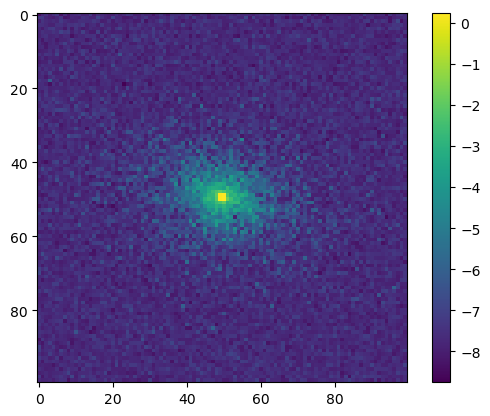

tensor(50) tensor(50)
tensor([41]) tensor([51])


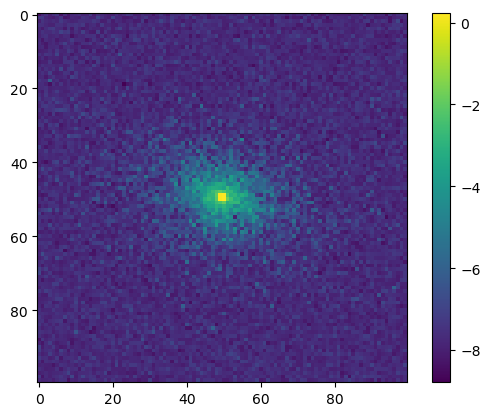

tensor(49) tensor(50)
tensor([50]) tensor([50])


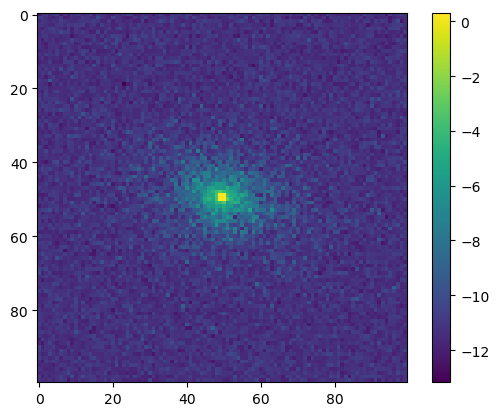

tensor(49) tensor(50)
tensor([68]) tensor([51])


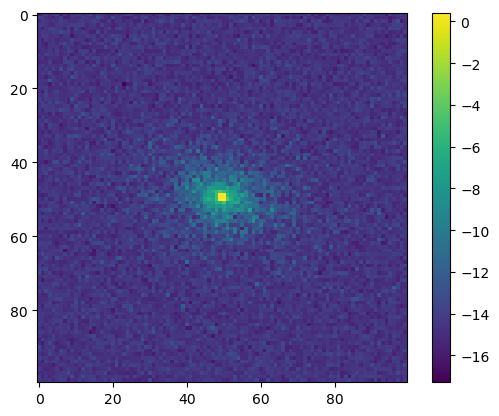

tensor(50) tensor(50)
tensor([49]) tensor([50])


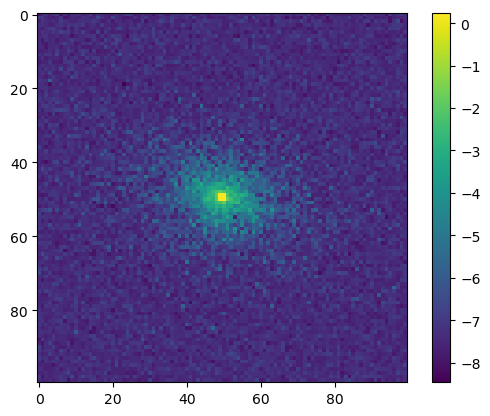

tensor(50) tensor(50)
tensor([49]) tensor([47])


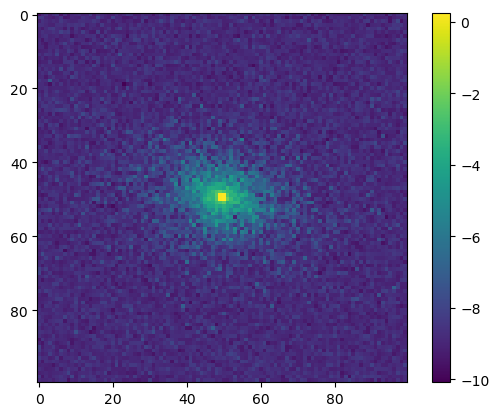

tensor(50) tensor(50)
tensor([54]) tensor([61])


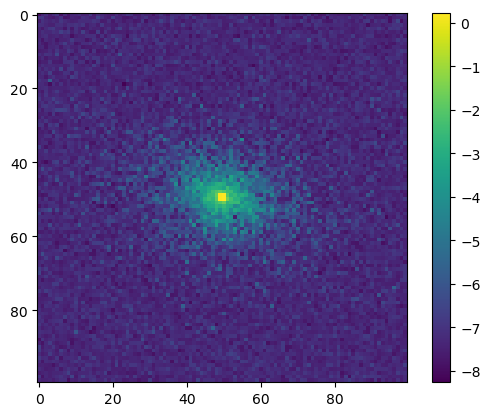

tensor(50) tensor(50)
tensor([49]) tensor([29])


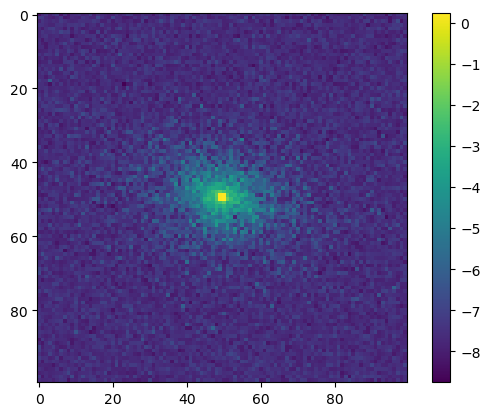

tensor(49) tensor(50)
tensor([50]) tensor([50])


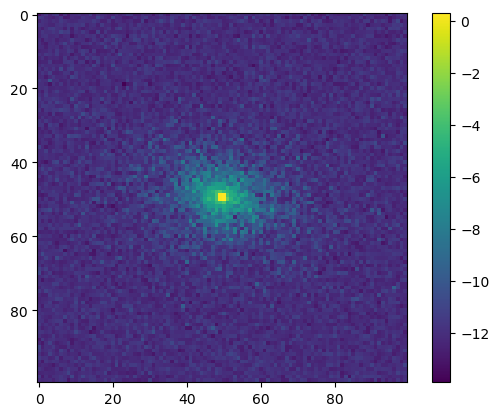

tensor(50) tensor(50)
tensor([49]) tensor([51])


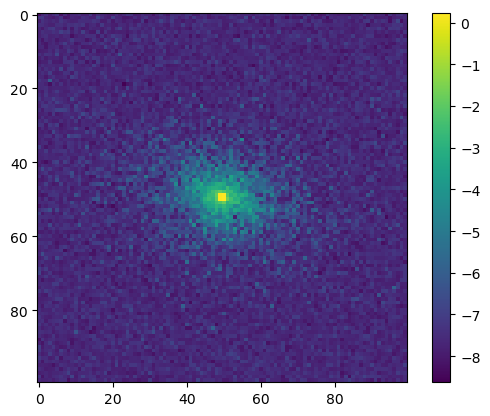

tensor(50) tensor(50)
tensor([48]) tensor([51])


In [95]:
# 1. Set the model in evaluation mode
model.eval()

for i in range(0, 10):

  pred_x = train_dl.dataset.tensors[0][i*100,:,:,:].unsqueeze(0)
  pred_y = train_dl.dataset.tensors[1][i*100].unsqueeze(0)
  

  # for j in range(0, 4):
  #   plt.imshow(pred_y[0, j].numpy())
  #   plt.colorbar()  
  #   plt.show()

  image = logits.view(100, 100).detach().cpu().numpy()
  plt.imshow(image)  # 'cmap' can be adjusted based on your data
  plt.colorbar()  # Optionally add a colorbar to see the scale
  # plt.title('Output Image')
  plt.show()

  with torch.no_grad():
    logits = model(pred_x)
  logits

  loc_next = torch.argmax(logits)
  y_next, x_next = loc_next % 100, loc_next // 100
  print(x_next, y_next)
  
  y_y, x_y = pred_y % 100, pred_y // 100
  print(x_y, y_y)




In [ ]:
logits.shape
print(logits[0, loc_next - 3 - 100: loc_next + 3 - 100])
print(logits[0, loc_next - 3: loc_next + 3])
print(logits[0, 100 + loc_next - 3: 100 + loc_next + 3])
print(logits[0, 100 + loc_next - 3 + 100: 100 + loc_next + 3 + 100])

In [75]:
# torch.softmax(logits).flatten().reshape(100, 100)[loc_next // 100 - 3: loc_next // 100 + 3, loc_next % 100 - 3: loc_next % 100 + 3]

In [74]:
torch.softmax(logits.flatten(), dim=0).reshape(100, 100)[loc_next // 100 - 3: loc_next // 100 + 3, loc_next % 100 - 3: loc_next % 100 + 3]

tensor([[3.5840e-05, 9.0065e-05, 9.2156e-05, 5.5837e-05, 5.6119e-06, 1.3110e-06],
        [1.5461e-04, 9.6363e-05, 9.6221e-05, 7.7512e-05, 3.8581e-04, 5.9405e-05],
        [4.6907e-04, 1.2448e-03, 2.9037e-03, 1.0368e-03, 3.3165e-04, 2.1352e-04],
        [1.9086e-04, 1.6205e-03, 2.2535e-01, 2.6376e-01, 1.1075e-03, 3.0173e-04],
        [2.6507e-04, 1.5846e-03, 2.2666e-01, 2.5268e-01, 3.4064e-03, 5.8118e-04],
        [1.2119e-04, 5.5525e-04, 6.9469e-04, 2.2785e-03, 9.2113e-05, 2.3185e-04]])

tensor([0.0005, 0.0012, 0.0029, 0.0010, 0.0003, 0.0002])
tensor([1.9086e-04, 1.6205e-03, 2.2535e-01, 2.6376e-01, 1.1075e-03, 3.0173e-04])
tensor([0.0003, 0.0016, 0.2267, 0.2527, 0.0034, 0.0006])
tensor([1.2119e-04, 5.5525e-04, 6.9469e-04, 2.2785e-03, 9.2113e-05, 2.3185e-04])


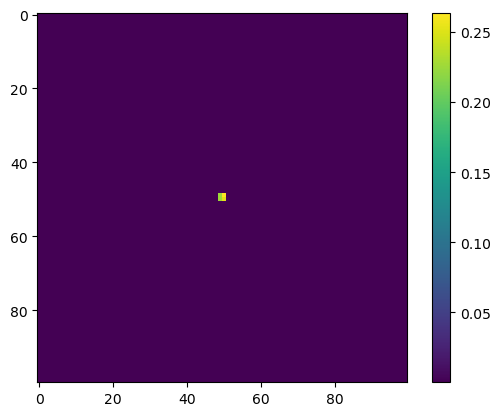

In [76]:
probs = nn.Softmax(dim=1)(logits)

print(probs[0,loc_next - 3 - 100: loc_next + 3 - 100])
print(probs[0, loc_next - 3: loc_next + 3])
print(probs[0, 100 + loc_next - 3: 100 + loc_next + 3])
print(probs[0, 100 + loc_next - 3 + 100: 100 + loc_next + 3 + 100])

image = probs.view(100, 100).detach().cpu().numpy()
plt.imshow(image)  # 'cmap' can be adjusted based on your data
plt.colorbar()  # Optionally add a colorbar to see the scale
# plt.title('Output Image')
plt.show()